In [238]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier


In [239]:
insurance_claim_data=pd.read_csv("insurance_claims.csv")

In [240]:
#first 5 rows of the dataset
insurance_claim_data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [241]:
#last five dataset
insurance_claim_data.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N
999,456,60,556080,1996-11-11,OH,250/500,1000,766.19,0,612260,...,3,?,5060,460,920,3680,Mercedes,E400,2007,N


In [242]:
#replacing value ? with nan
insurance_claim_data.replace('?',np.nan,inplace=True)

In [243]:
insurance_claim_data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [244]:
insurance_claim_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [245]:
insurance_claim_data.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted           91
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

                   Feature  Null_Count
0    authorities_contacted       0.091
1           collision_type       0.178
2  police_report_available       0.343
3          property_damage       0.360


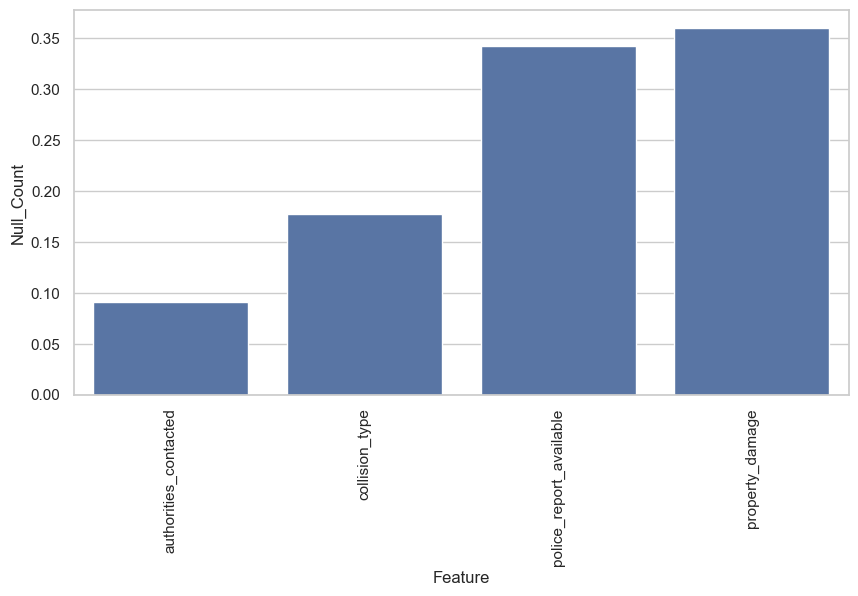

In [246]:

# ✅ Missing values ka percentage calculate karo
missing = insurance_claim_data.isnull().sum() / len(insurance_claim_data)

# ✅ Sirf missing value wale columns rakho
missing = missing[missing > 0]

missing.sort_values(inplace=True)

# ✅ Data ko DataFrame me convert karo with proper column name
missing = missing.to_frame()
missing.columns=['Null_Count']

# ✅ Index ka naam set karo (yeh "Feature" column ban jayega reset karne ke baad)
missing.index.name = "Feature"

# ✅ Index ko reset karo taki "Feature" column alag aa jaye
missing = missing.reset_index()

# ✅ Debugging ke liye print karo
print(missing)
# ✅ Seaborn barplot
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(10,5))
sns.barplot(x="Feature", y="Null_Count", data=missing)
plt.xticks(rotation=90)
plt.show()

In [247]:
insurance_claim_data["collision_type"].fillna(insurance_claim_data["collision_type"].mode()[0], inplace=True)
insurance_claim_data["police_report_available"].fillna(insurance_claim_data["police_report_available"].mode()[0], inplace=True)
insurance_claim_data["property_damage"].fillna(insurance_claim_data["property_damage"].mode()[0], inplace=True)
insurance_claim_data["authorities_contacted"].fillna(insurance_claim_data["authorities_contacted"].mode()[0], inplace=True)


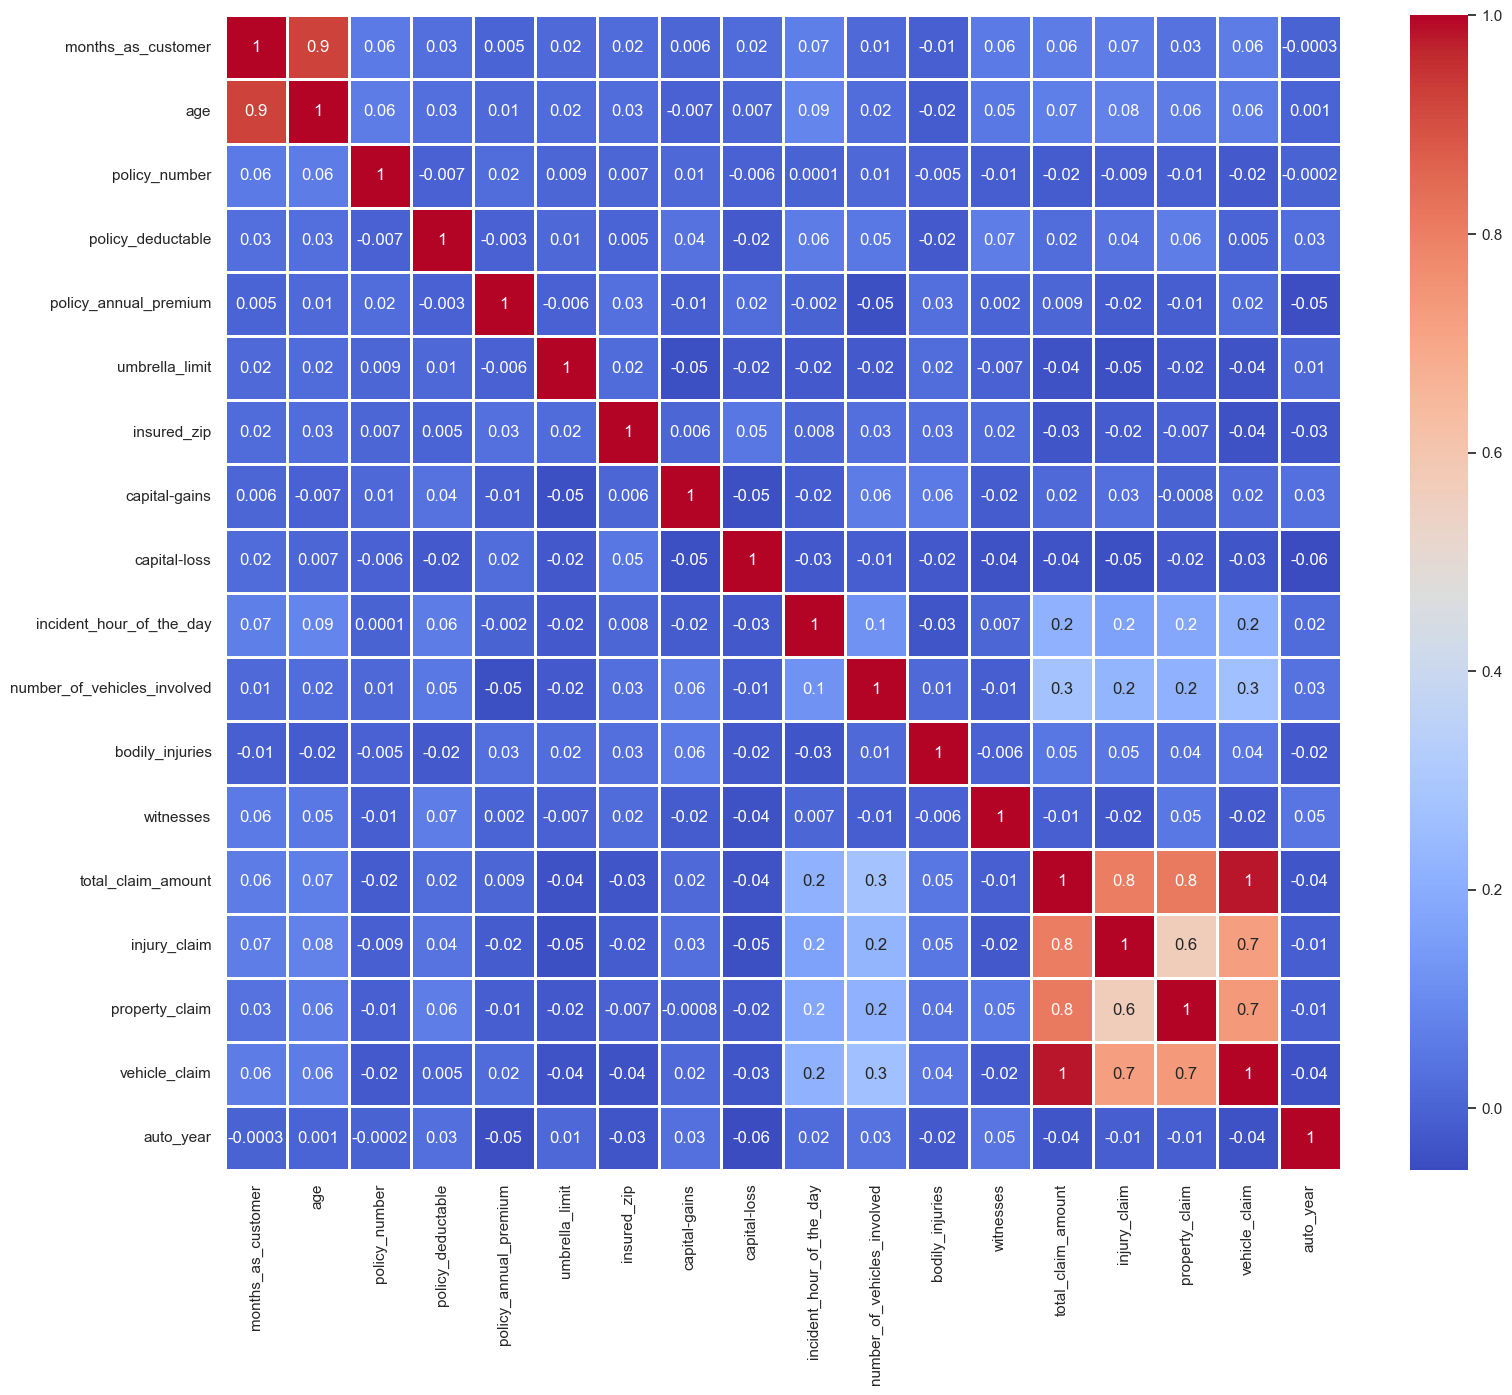

In [248]:
plt.figure(figsize=(18,15))
corr=insurance_claim_data.corr(numeric_only=True)
sns.heatmap(data=corr,annot=True,fmt='.1g',linewidth=2,cmap="coolwarm")
plt.show()

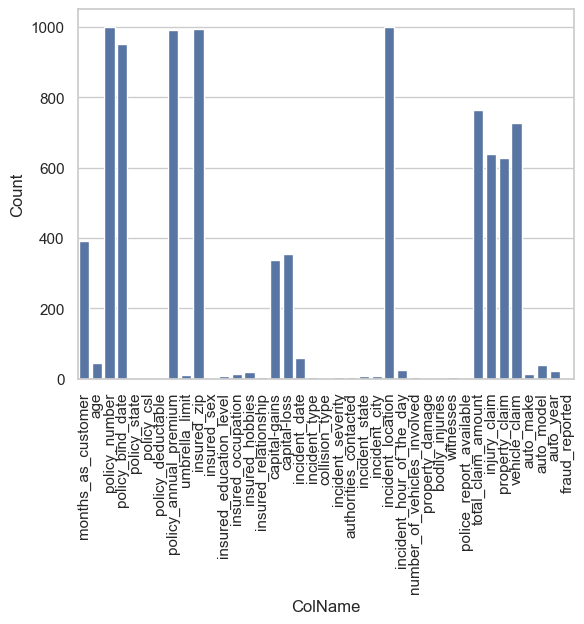

In [249]:
unique=insurance_claim_data.nunique().to_frame()
unique.columns=['Count']
unique.index.names=['ColName']
unique=unique.reset_index()
sns.set(style='whitegrid',color_codes=True)
sns.barplot(x='ColName',y='Count' ,data=unique)
plt.xticks(rotation=90)
plt.show()

In [250]:
unique.sort_values(by='Count',ascending=False)

,ColName,Count
2,policy_number,1000
24,incident_location,1000
9,insured_zip,995
7,policy_annual_premium,991
3,policy_bind_date,951
31,total_claim_amount,763
34,vehicle_claim,726
32,injury_claim,638
33,property_claim,626
0,months_as_customer,391


In [251]:
to_drop = ['policy_number', 'incident_location', 'insured_zip', 'policy_bind_date', 
           'incident_state', 'injury_claim', 'auto_year', 'auto_model', 'auto_make', 
           'insured_hobbies', 'incident_city', 'incident_date']
insurance_claim_data.drop(to_drop,inplace=True,errors='ignore')


In [252]:
insurance_claim_data.head()

ColName,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


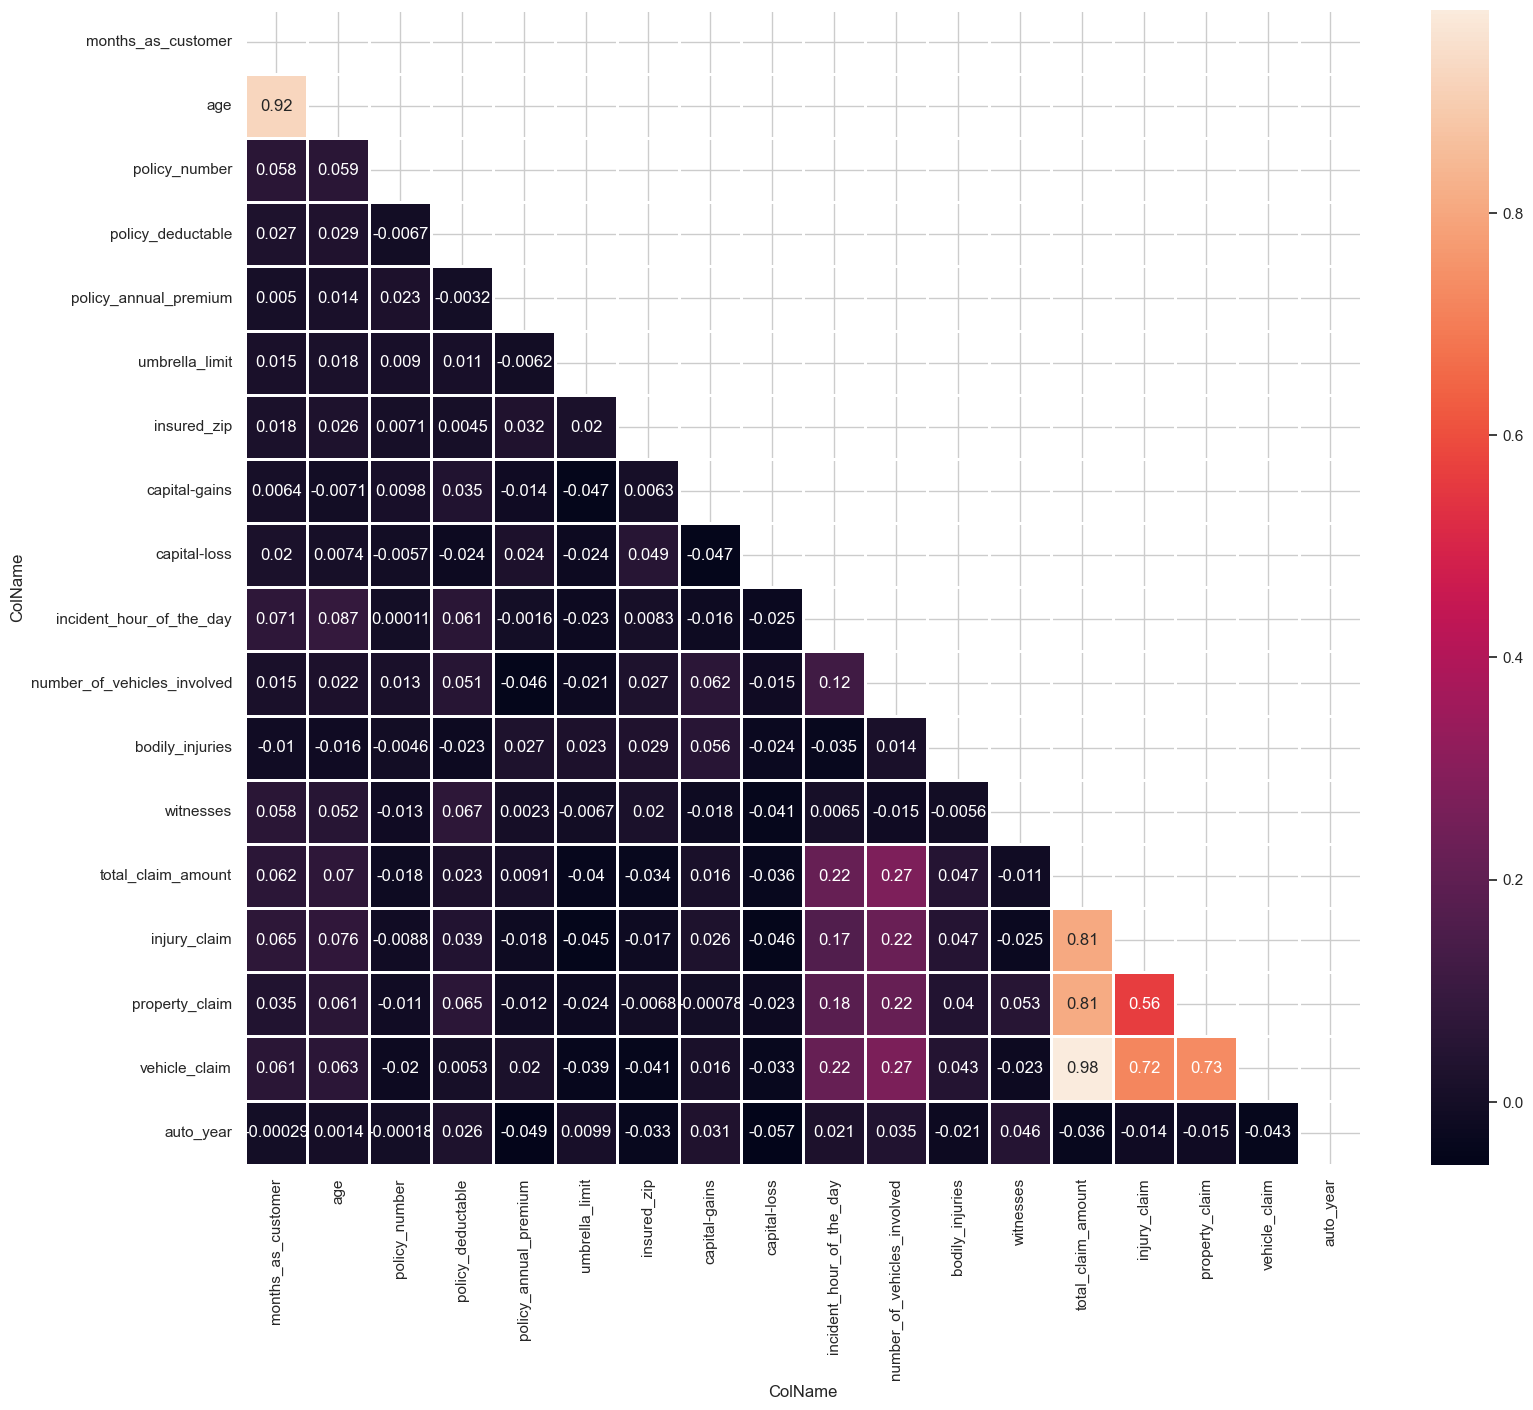

In [253]:
plt.figure(figsize=(18,15))
corr=insurance_claim_data.corr(numeric_only=True)
mask=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(data=corr,mask=mask,annot=True,fmt='.2g',linewidth=1)
plt.show()

In [254]:
insurance_claim_data.drop(columns=['age','total_claim_amount'],inplace=True,errors='ignore')

In [255]:
insurance_claim_data.head()

ColName,months_as_customer,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,1,2,YES,6510,13020,52080,Saab,92x,2004,Y
1,228,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,0,NO,780,780,3510,Mercedes,E400,2007,Y
2,134,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,2,3,NO,7700,3850,23100,Dodge,RAM,2007,N
3,256,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,1,2,NO,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,0,1,NO,1300,650,4550,Accura,RSX,2009,N


In [256]:
#Get Target and Independent features Separated
X=insurance_claim_data.drop('fraud_reported',axis=1)
y=insurance_claim_data['fraud_reported']

In [257]:


# Select categorical columns
categorical_cols = X.select_dtypes(include=['object'])


# Perform one-hot encoding
categorical_cols_encoded = pd.get_dummies(categorical_cols, drop_first=True)
categorical_cols_encoded = categorical_cols_encoded.astype(int)
categorical_cols_encoded.head()

,policy_bind_date_1990-01-27,policy_bind_date_1990-02-01,policy_bind_date_1990-02-03,policy_bind_date_1990-02-08,policy_bind_date_1990-02-14,policy_bind_date_1990-02-15,policy_bind_date_1990-02-18,policy_bind_date_1990-02-23,policy_bind_date_1990-03-14,policy_bind_date_1990-03-17,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [258]:
numerical_col=X.select_dtypes(include=['int64','float64'])
X=pd.concat([numerical_col,categorical_cols_encoded],axis=1)  

In [259]:
X.head()


,months_as_customer,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,521585,1000,1406.91,0,466132,53300,0,5,1,...,0,0,0,0,0,0,0,0,0,0
1,228,342868,2000,1197.22,5000000,468176,0,0,8,1,...,0,0,0,0,0,0,0,0,0,0
2,134,687698,2000,1413.14,5000000,430632,35100,0,7,3,...,0,1,0,0,0,0,0,0,0,0
3,256,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,...,0,0,0,0,0,1,0,0,0,0
4,228,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,...,0,0,1,0,0,0,0,0,0,0


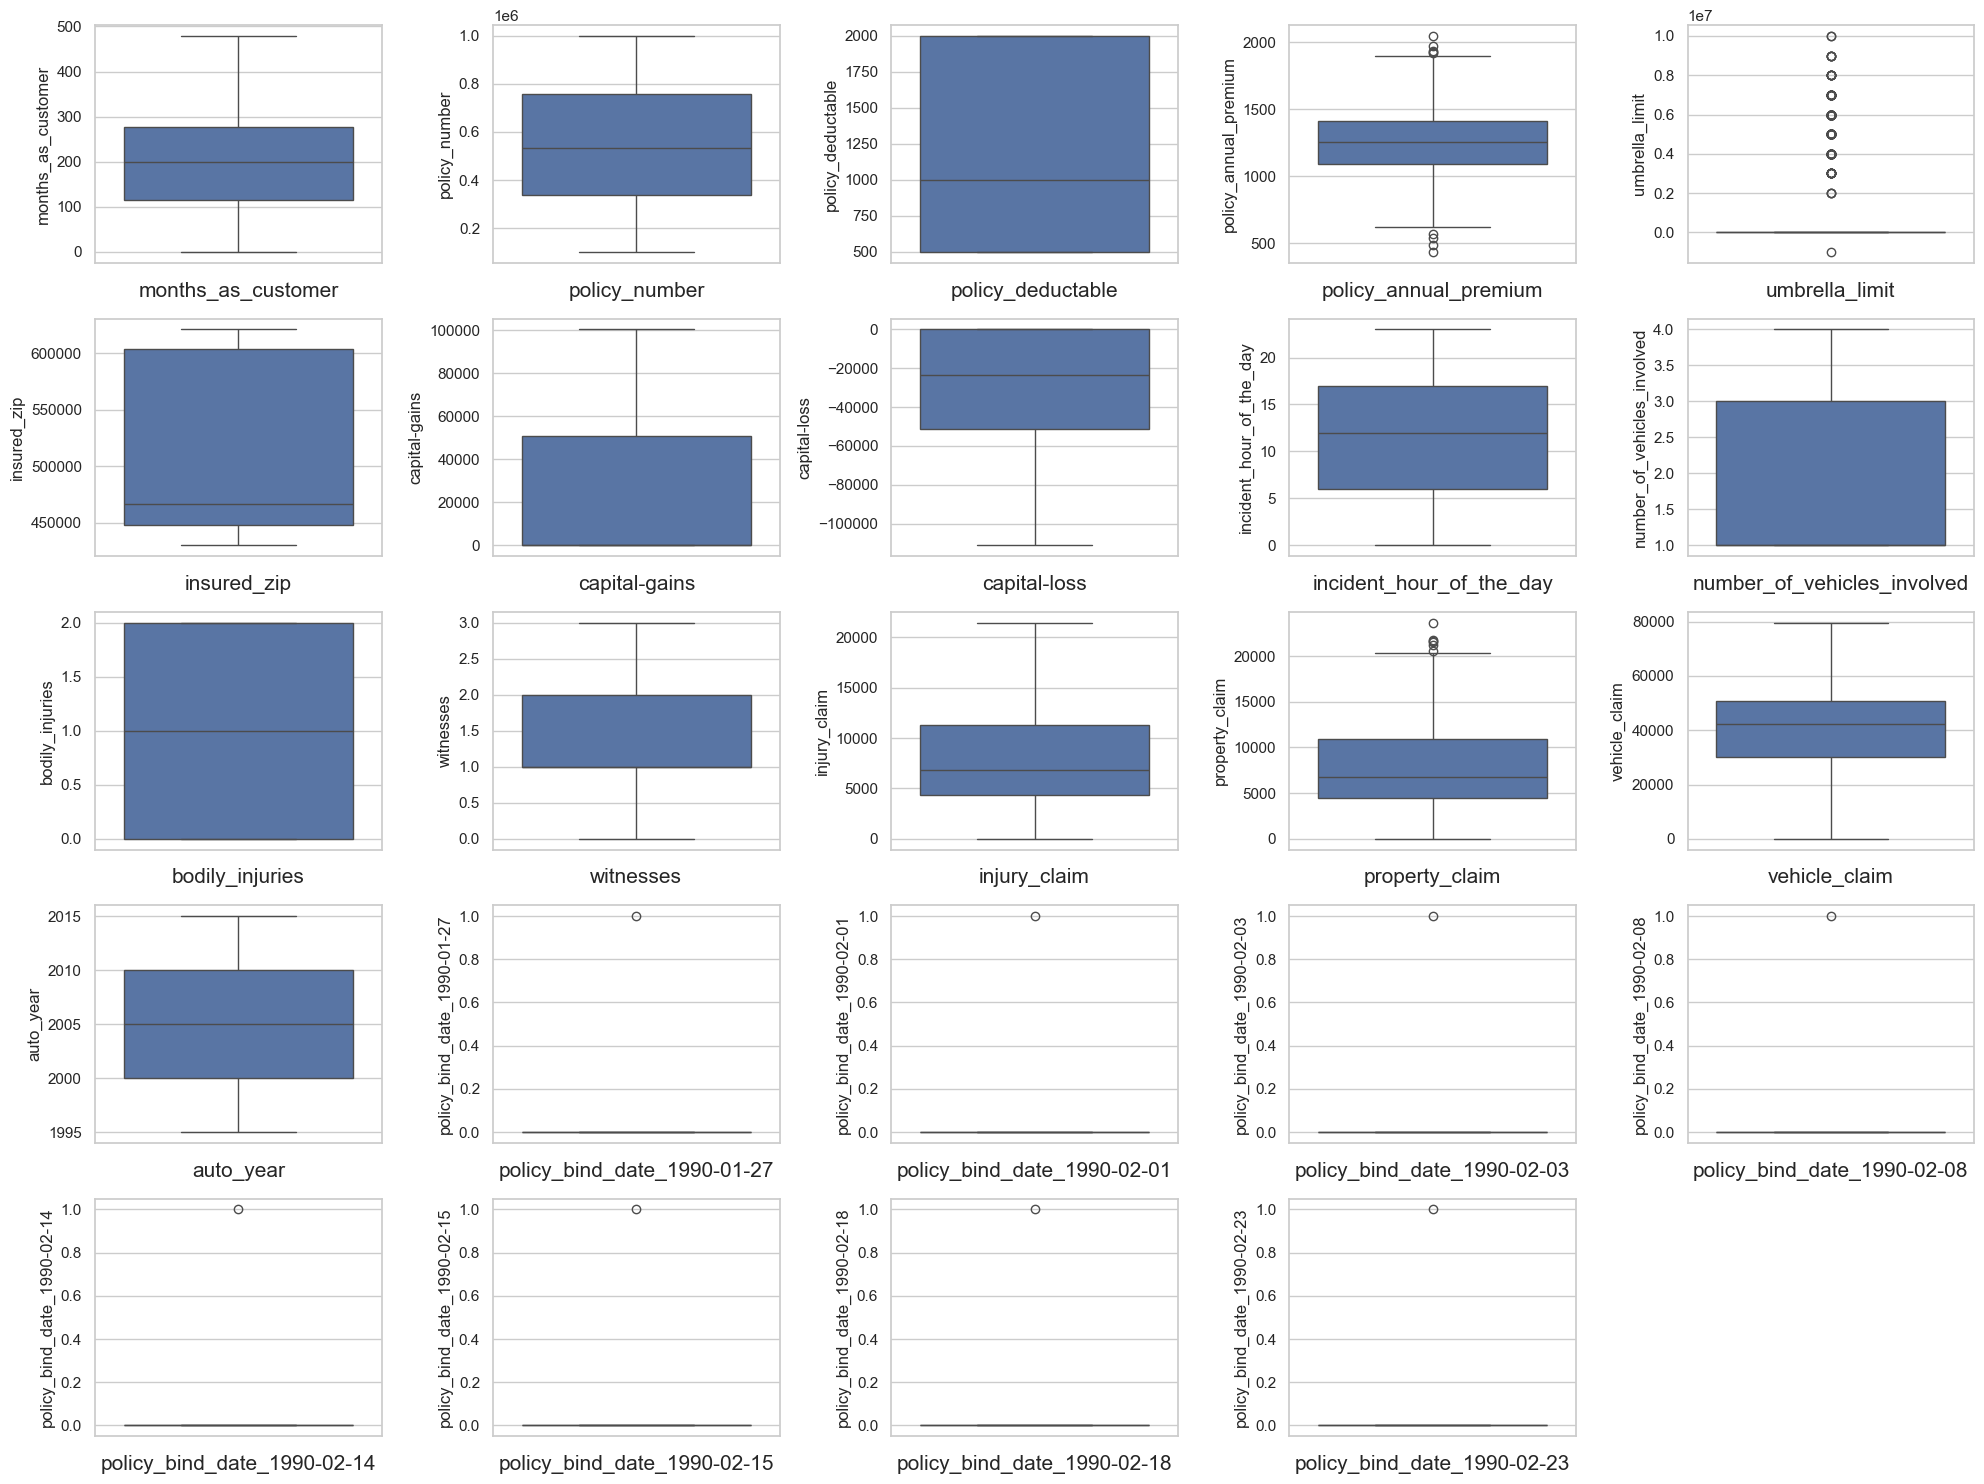

In [260]:
#outliers check 
plt.figure(figsize=(20,15))
plotnumber=1
for col in X.columns:
    if plotnumber<=24:
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col,fontsize=15)
        plotnumber += 1
plt.tight_layout()
plt.show()
        


In [261]:
#outlier is there so we need to Sandarise thosese columns
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)


In [262]:
# Feature Selection using Feature Importance
model_temp = RandomForestClassifier(n_estimators=100, random_state=42)
model_temp.fit(X, y)
feature_importances = pd.Series(model_temp.feature_importances_, index=X.columns)
selected_features = feature_importances.nlargest(30).index.tolist()  # Selecting top 20 features
X = X[selected_features]

In [263]:
numerical_data=X_train[['months_as_customer','policy_deductable','umbrella_limit', 'capital-gains', 'capital-loss','incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries','witnesses']]

In [264]:

#standarisation
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Scaled_data=scaler.fit_transform(numerical_data)

In [265]:
scaled_num_df=pd.DataFrame(data=Scaled_data,columns=numerical_data.columns,index=X_train.index)
scaled_num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses
574,-0.855721,-1.055783,0.778187,-0.899572,0.977971,-0.102642,-0.838244,0.014626,-1.314338
521,-1.698240,1.393199,-0.493360,0.232802,0.977971,1.489085,-0.838244,0.014626,1.378977
839,0.290799,-1.055783,-0.493360,-0.899572,-0.741278,-1.115560,-0.838244,1.233423,0.481206
201,1.228861,-1.055783,-0.493360,1.368770,0.491790,-1.260263,-0.838244,1.233423,-1.314338
189,-0.629891,-0.239456,-0.493360,1.354391,0.977971,-0.102642,-0.838244,-1.204171,0.481206


In [266]:
X_train.drop(columns=scaled_num_df.columns,inplace=True)

In [267]:
X_train=pd.concat([X_train,scaled_num_df],axis=1)

In [268]:
X_train.head()

,policy_number,policy_annual_premium,insured_zip,injury_claim,property_claim,vehicle_claim,auto_year,policy_bind_date_1990-01-27,policy_bind_date_1990-02-01,policy_bind_date_1990-02-03,...,auto_model_X6,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses
574,783494,1537.07,457733,9480,4740,33180,2004,0,0,0,...,0,-0.855721,-1.055783,0.778187,-0.899572,0.977971,-0.102642,-0.838244,0.014626,-1.314338
521,924318,1137.02,468872,16020,16020,56070,2003,0,0,0,...,0,-1.698240,1.393199,-0.493360,0.232802,0.977971,1.489085,-0.838244,0.014626,1.378977
839,965187,1257.04,448294,10320,5160,36120,2011,0,0,0,...,0,0.290799,-1.055783,-0.493360,-0.899572,-0.741278,-1.115560,-0.838244,1.233423,0.481206
201,505969,1722.95,472634,7670,7670,61360,2006,0,0,0,...,0,1.228861,-1.055783,-0.493360,1.368770,0.491790,-1.260263,-0.838244,1.233423,-1.314338
189,438817,986.53,472720,18520,18520,64820,2007,0,0,0,...,0,-0.629891,-0.239456,-0.493360,1.354391,0.977971,-0.102642,-0.838244,-1.204171,0.481206


In [269]:
print(X_train.columns)
print(X_test.columns)


Index(['policy_number', 'policy_annual_premium', 'insured_zip', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_year',
       'policy_bind_date_1990-01-27', 'policy_bind_date_1990-02-01',
       'policy_bind_date_1990-02-03',
       ...
       'auto_model_X6', 'months_as_customer', 'policy_deductable',
       'umbrella_limit', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses'],
      dtype='object', length=2148)
Index(['months_as_customer', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved',
       ...
       'auto_model_Pathfinder', 'auto_model_RAM', 'auto_model_RSX',
       'auto_model_Silverado', 'auto_model_TL', 'auto_model_Tahoe',
       'auto_model_Ultima', 'auto_model_Wrangler', 'auto_model_X5',
       'auto_model_X6'],
   

In [270]:
X_test = X_test[X_train.columns]  # Reorder & drop extra columns


In [272]:
#SVM Model

In [273]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(X_train,y_train)
y_pred=svc_model.predict(X_test)


In [274]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
svc_model_train_acc=accuracy_score(y_train,svc_model.predict(X_train))
svc_model_test_acc=accuracy_score(y_test,y_pred)
print("Training Accuracy:",svc_model_train_acc)
print("Testing Accuracy:",svc_model_test_acc)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training Accuracy: 0.7573333333333333
Testing Accuracy: 0.74
[[185   0]
 [ 65   0]]
              precision    recall  f1-score   support

           N       0.74      1.00      0.85       185
           Y       0.00      0.00      0.00        65

    accuracy                           0.74       250
   macro avg       0.37      0.50      0.43       250
weighted avg       0.55      0.74      0.63       250



In [275]:
#  decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Decision Tree model with slight tuning
dt_model = DecisionTreeClassifier(
    max_depth=10,       # Prevent overfitting
    min_samples_split=5, # Prevent overfitting
    min_samples_leaf=2,  # Ensure generalization
    random_state=42
)

# Train model
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate model
decision_train_acc = accuracy_score(y_train, dt_model.predict(X_train))
decision_test_acc = accuracy_score(y_test, y_pred_dt)

print("Decision Tree Training Accuracy:", decision_train_acc)
print("Decision Tree Testing Accuracy:", decision_test_acc)
print("Confusion Matrix (DT):\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report (DT):\n", classification_report(y_test, y_pred_dt))


Decision Tree Training Accuracy: 0.944
Decision Tree Testing Accuracy: 0.852
Confusion Matrix (DT):
 [[166  19]
 [ 18  47]]
Classification Report (DT):
               precision    recall  f1-score   support

           N       0.90      0.90      0.90       185
           Y       0.71      0.72      0.72        65

    accuracy                           0.85       250
   macro avg       0.81      0.81      0.81       250
weighted avg       0.85      0.85      0.85       250



In [276]:
#RANDOM FOREST

In [277]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 15, 20, 25, None],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None,'balanced', {'N': 1, 'Y': 5}],
}

# RandomizedSearchCV
rf_random = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,  # Total 20 combinations try karega
    cv=5,  # 5-fold cross-validation karega
    scoring='accuracy',
    n_jobs=-1,  # Parallel computation use karega
    random_state=42
)

# Hyperparameter tuning start
rf_random.fit(X_train, y_train)

# Best parameters print karein
print("Best Parameters:", rf_random.best_params_)

# Best model ko test data par evaluate karein
best_rf_model = rf_random.best_estimator_
y_pred = best_rf_model.predict(X_test)


Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10, 'criterion': 'entropy', 'class_weight': 'balanced'}


In [278]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
best_rf_model_train_acc=accuracy_score(y_train,best_rf_model.predict(X_train))
best_rf_model_test_acc=accuracy_score(y_test,y_pred)
print("Training Accuracy:",best_rf_model_train_acc)
print("Testing Accuracy:",best_rf_model_test_acc)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training Accuracy: 0.9733333333333334
Testing Accuracy: 0.824
[[167  18]
 [ 26  39]]
              precision    recall  f1-score   support

           N       0.87      0.90      0.88       185
           Y       0.68      0.60      0.64        65

    accuracy                           0.82       250
   macro avg       0.77      0.75      0.76       250
weighted avg       0.82      0.82      0.82       250



In [189]:
#LOGISTIC REGRESSION

In [279]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Logistic Regression Model
log_reg = LogisticRegression(class_weight={'N': 1, 'Y': 5}, random_state=42, max_iter=500)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test)




In [280]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
log_reg_train_acc=accuracy_score(y_train,log_reg.predict(X_train))
log_reg_test_acc=accuracy_score(y_test,y_pred)
print("Training Accuracy:",log_reg_train_acc)
print("Testing Accuracy:",log_reg_test_acc)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training Accuracy: 0.6386666666666667
Testing Accuracy: 0.824
[[167  18]
 [ 26  39]]
              precision    recall  f1-score   support

           N       0.87      0.90      0.88       185
           Y       0.68      0.60      0.64        65

    accuracy                           0.82       250
   macro avg       0.77      0.75      0.76       250
weighted avg       0.82      0.82      0.82       250



In [ ]:
# xgboost

In [281]:
from sklearn.preprocessing import LabelEncoder

# Convert 'Yes' → 1 and 'No' → 0
y_train = LabelEncoder().fit_transform(y_train)
y_test=LabelEncoder().fit_transform(y_test)

In [282]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# XGBoost Classifier with optimized parameters
xgb_model = XGBClassifier(
    n_estimators=500,  
    learning_rate=0.05,  
    max_depth=6,  
    scale_pos_weight=5,  
    colsample_bytree=0.8,  # Feature selection better karega
    subsample=0.8,  # Overfitting prevent karega
    gamma=0.2,  # Overfitting ko control karega
    objective='binary:logistic', 
    eval_metric='logloss',
    random_state=42
)

# Hyperparameter grid for tuning
param_grid = {
    'n_estimators': [300, 500, 700],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [3, 5, 7]
}

# RandomizedSearchCV for hyperparameter tuning
xgb_random = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,  # 20 combinations try karega
    scoring='accuracy',  
    cv=5,  
    n_jobs=-1,  
    random_state=42,
    verbose=2
)

# Train XGBoost with tuning
xgb_random.fit(X_train, y_train)

# Best Model
best_xgb_model = xgb_random.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [283]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
xgb_model_train_acc=accuracy_score(y_train,best_xgb_model.predict(X_train))
xgb_model_test_acc=accuracy_score(y_test,y_pred_xgb)
print("Training Accuracy:",xgb_model_train_acc)
print("Testing Accuracy:",xgb_model_test_acc)
print(confusion_matrix(y_test,y_pred_xgb))
print(classification_report(y_test,y_pred_xgb))

Training Accuracy: 0.9333333333333333
Testing Accuracy: 0.84
[[165  20]
 [ 20  45]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       185
           1       0.69      0.69      0.69        65

    accuracy                           0.84       250
   macro avg       0.79      0.79      0.79       250
weighted avg       0.84      0.84      0.84       250



In [ ]:
# ANN

In [284]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Feature scaling for ANN
scaler = StandardScaler()
X_train_rescaled = scaler.fit_transform(X_train)  # No resampling
X_test_rescaled = scaler.transform(X_test)

# Ensure y_train and y_test are numpy arrays
y_train = np.array(y_train).reshape(-1, 1)  # Reshape to (n_samples, 1)
y_test = np.array(y_test).reshape(-1, 1)    # Reshape to (n_samples, 1)

# Convert dataset to PyTorch tensors
X_train_tensor = torch.tensor(X_train_rescaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_rescaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create PyTorch dataset and dataloader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Define Improved ANN Model
class FraudDetectionANN(nn.Module):
    def __init__(self, input_dim):
        super(FraudDetectionANN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.relu1 = nn.LeakyReLU()
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.relu2 = nn.LeakyReLU()
        self.fc3 = nn.Linear(64, 32)
        self.relu3 = nn.LeakyReLU()
        self.fc4 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.relu1(self.bn1(self.fc1(x)))
        x = self.relu2(self.bn2(self.fc2(x)))
        x = self.relu3(self.fc3(x))
        x = self.fc4(x)  # No sigmoid here, BCEWithLogitsLoss will handle it
        return x

# Initialize model, loss function, and optimizer
input_dim = X_train_tensor.shape[1]
model = FraudDetectionANN(input_dim)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0005)

# Training loop
epochs = 50
for epoch in range(epochs):
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        y_pred = model(batch_X)
        loss = criterion(y_pred, batch_y)
        loss.backward()
        optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# Predictions and evaluation
with torch.no_grad():
    y_pred_test = model(X_test_tensor).squeeze().numpy()
    y_pred_test = [1 if prob > 0 else 0 for prob in y_pred_test]  # No need for sigmoid explicitly

# Accuracy and classification report
ann_accuracy = accuracy_score(y_test, y_pred_test)
print("ANN Model Accuracy:", ann_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_test))


Epoch 10/50, Loss: 0.0057
Epoch 20/50, Loss: 0.0046
Epoch 30/50, Loss: 0.0172
Epoch 40/50, Loss: 0.0004
Epoch 50/50, Loss: 0.0004
ANN Model Accuracy: 0.744
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.99      0.85       185
           1       0.60      0.05      0.09        65

    accuracy                           0.74       250
   macro avg       0.67      0.52      0.47       250
weighted avg       0.71      0.74      0.65       250



In [ ]:
#Model comparision

In [285]:
models=pd.DataFrame({
    'Model':['svc model','Decision tree','Random forest','Logistic Regression','XgBoost','ANN'],
    'Score':[svc_model_test_acc,decision_test_acc,best_rf_model_test_acc,log_reg_test_acc,xgb_model_test_acc,ann_accuracy]
})
models.sort_values(by='Score',ascending=False)

,Model,Score
1,Decision tree,0.852
4,XgBoost,0.840
3,Logistic Regression,0.824
2,Random forest,0.824
5,ANN,0.744
0,svc model,0.740


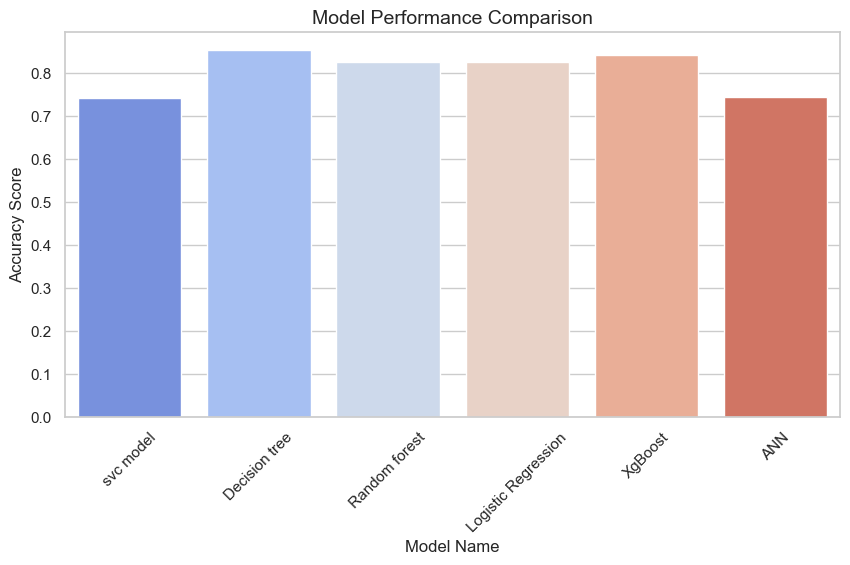

In [286]:
plt.figure(figsize=(10,5))
sns.barplot(x='Model', y='Score', data=models, palette='coolwarm')
plt.xlabel('Model Name', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.title('Model Performance Comparison', fontsize=14)
plt.xticks(rotation=45)
plt.show()